# E-tivity 1 (29/01/24 - 11/02/24)

* Name: Paul Trayers

* Student ID: 8907021

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv".

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to the Group Locker.

Marks will be deducted if task 4 is uploaded in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-4 and with correct identification or filename.

Grading guidelines: the scores for each task are additive. Below is a link to the E-tivity rubrics.

https://learn.ul.ie/d2l/lp/rubrics/edit_structure.d2l?rubricId=1424&ou=17935



## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from Brightspace, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Sunday 04/02/24)

The initial implementation of the tasks are to be uploaded to the locker on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

#### Initial Setup - Data Source

In [ ]:
# Mount my Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd /content/drive/MyDrive/cs5004/Etivities/Etivity1/
!ls -ail ./data/data.csv

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c231b39faad1>", line 5, in <cell line: 5>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/cs5004/Etivities/Etivity1/')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/loca

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-c231b39faad1>", line 5, in <cell line: 5>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/cs5004/Etivities/Etivity1/')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-pack

# **Task 1: Data Preprocessing**


Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.

## 1.1 Load Dataset

In [ ]:
import pandas as pd

# Specify the path to your CSV file
file_path = './data/data.csv'

# Load the dataset
data = pd.read_csv(file_path)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-e94f2d846439>", line 7, in <cell line: 7>
    data = pd.read_csv(file_path)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f, se

In [ ]:
# Display the first and last few rows of the dataframe to review and verify it's loaded correctly
print(data.head())
print("...")
print(data.tail())

Get a sense of the distributions of the different data feature.

In [ ]:
data.describe()

We will not perform any identification or removal of outliers since the objective here is to identify anomolies within an existing dataset. However the identifif=cation of ourliers here may help us decide whether to use MAE over MSE as the error function.

## 1.2 Preprocessing

To prepare for anomaly detection with an autoencoder on the dataset, we will follow a series of preprocessing and data partitioning steps. Autoencoders are neural networks designed for unsupervised learning tasks, particularly useful for anomaly (or outlier) detection. They learn to compress the input into a lower-dimensional representation (encoding) and then reconstruct the input from this representation (decoding). The idea is for the autoencoder will learn to reconstruct normal data well but will have difficulty with anomalous data, which can then be identified based on the reconstruction error.

### 1.2.1 Normalization and Standardization
Since autoencoders can be sensitive to the scale of the input data, we can normalize and standardize our variables to be on a similar scale.

Standardization rescales data to have a mean of 0 and a standard deviation of 1. This is particularly important given the different ranges and standard deviations of our features here.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming `data` is your DataFrame with the last column being 'Anom' and the rest are features
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Anomaly labels (not used for training, just for evaluation)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

Normalization rescales the data to range [0,1]. This will allow us to use the sigmoid activation function in training.

In [ ]:
import tensorflow as tf

# Assuming X_scaled is our standardized feature data as a TensorFlow tensor
min_val = tf.reduce_min(X_scaled)
max_val = tf.reduce_max(X_scaled)

# Perform min-max normalization
X_norm = (X_scaled - min_val) / (max_val - min_val)

# Cast the normalized data to float32
X_norm = tf.cast(X_norm, tf.float32).numpy()

print(X_norm)

### 1.2.2 Handling Missing Values
Checking if the dataset has missing values, we can then decide on a strategy for dealing with them. Options include imputing missing values using the mean, median, or another method, or we might remove rows with missing values if there are not many.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


No missing values are present.

### 1.2.3 Feature Selection or Dimensionality Reduction


Calculate correlation matrix to identify any highly correlated features that provide opportunity for dimensionality reduction.

In [ ]:
# Compute pairwise correlation of columns
df_without_anom = df.drop('Anom', axis=1)  # This removes the 'Anom' column from the DataFrame
correlation_matrix = df_without_anom.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()

# Output the results
missing_values, correlation_matrix

#### 1.2.3.1 Correlation Analysis

Ignoring `Anom`, there are some pairs that are highly correlated suggesting that they share a lot of information;

High Correlation Pairs:
* V8 and V9 have a high correlation coefficient of 0.825522
* V1 and Anom have a high correlation of 0.822831.
* V5 and V8 have a very high negative correlation (-0.904447), indicating that as one increases, the other tends to decrease, and vice versa.
* V5 and V9 also have a high negative correlation(-0.835857).

Given the high correlations among several variables, dimensionality reduction techniques such as Principal Component Analysis (PCA) could be beneficial in reducing the dataset to a lower-dimensional space while retaining most of the variation in the dataset.

If the dataset was high-dimensional, we could consider reducing its dimensionality, however having only 9 explanatory variables, this step might not be necessary and we will omit for this task.

## 1.3 Training and Test Sets Selection


### 1.3.1 Approach - Assume all data as normal

Based on the assumption that anomalies are rare and that we do not know which data is anomalous, we will treat all data as if it were normal, training a portion of it (80%) then evaluating its performance on the remaining test set (20%).


### 1.3.2 Split the Data
We randomly split the data into a training set and a test set based on the commonly used split of 80% for training and 20% for testing. Since we have 50k records such a split will give us sufficient data for training and testing.

We will use a stratefied split to ensure the proportions of the two classes (normal and anomaly) are maintained in both the training and testing sets.

In [ ]:
# Split the dataset into training (80%) and test set (20%)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# 'X_norm' are our normalized and scaled features and 'y' is the target variable
#X_train, X_test, y_train, y_test = train_test_split(
#    X_norm,
#    y,
#    test_size=0.2,
#    random_state=42,
#    stratify=y  # Ensures that the train and test sets have approximately the same percentage of samples of each target class
#)


Here we apply SMOTE (Synthetic Minority Over-sampling Technique) as an over-sampling method to address the class imbalance by creating synthetic examples of the minority (anomaly) class.

Generating new synthetic samples from the minority class, SMOTE tries to provide more balance in the dataset, with the aim of helping to improve the performance of the learning algorithm.

Note that we are **only** applying to the training data and not the test data to ensures that the model is evaluated on real, not synthetic, data. However, it is not always the best choice to add for every problem, so we will review whether it improves the model or not.

In [ ]:
from imblearn.over_sampling import SMOTE

# Then apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now we have X_train_resampled, y_train_resampled for training your model, and X_test, y_test for testing

In [ ]:
print(X_train)
print(y_test)
print(X_test)
print(y_train)

# Print the sizes of the training and test sets
print(f"\nTraining set size (features): {X_train.shape}")
print(f"Test set size (features): {X_test.shape}")

# Calculate and print the distribution of the target classes in the training and test sets
unique, counts_train = np.unique(y_train, return_counts=True)
unique, counts_test = np.unique(y_test, return_counts=True)

print(f"Training set distribution of target classes: {dict(zip(unique, counts_train))}")
print(f"Test set distribution of target classes: {dict(zip(unique, counts_test))}")

# SMOTE resampled training set
#print(f"\n\nSMOTE resampled training set...\n")

#print(X_train_resampled)
#print(y_train_resampled)

#print(f"\nTraining set (resampled) size (features): {X_train_resampled.shape}")
#unique, counts_train_resampled = np.unique(y_train_resampled, return_counts=True)
#print(f"Training set (resampled) distribution of target classes: {dict(zip(unique, counts_train_resampled))}")

# **Task 2: Model Generation and Training**

Here we will create a basic autoencoder structure containing an encoder and decoder with the bottleneck layer (2 latent variables) which forces the autoencoder to learn a compressed/encoded representation of the input data.

We will judge the efficiency of our autoencoder by how well the decoded output matches the original input and may adjust based on the results (reconstruction errors).

In [ ]:
# Uncomment if we choose to include SMOTE synthetic instances.

#X_train=X_train_resampled
#y_train=y_train_resampled

### 2.1 Create Autoencoder network

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_autoencoder(input_dim):
    input_layer = Input(shape=(input_dim,))

    # Encoder
    encoded = Dense(128, activation='relu')(input_layer)
    encoded = Dropout(0.2)(encoded)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(32, activation='relu')(encoded)
    encoded = Dense(2, activation='relu')(encoded)  # Keep relu for encoding

    # Decoder part (mirrors the encoder)
    decoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(decoded)
    decoded = Dropout(0.2)(decoded)
    decoded = Dense(128, activation='relu')(decoded)
    output_layer = Dense(input_dim, activation='sigmoid')(decoded)  # sigmoid is appropriate since we have normalized the data to range [0-1]

    # Previous simpler architecture (not as performant)

    # Encoder
    #encoded = Dense(64, activation='relu')(input_layer)
    #encoded = Dense(32, activation='relu')(encoded)
    #bottleneck = Dense(2, activation='relu')(encoded)  # Latent space representation

    # Decoder
    #decoded = Dense(32, activation='relu')(bottleneck)
    #decoded = Dense(64, activation='relu')(decoded)

    #output_layer = Dense(input_dim, activation='sigmoid')(decoded)

    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    return autoencoder

#### 2.1 Train the autoencoder network

Next we will train the autoencoder network in TensorFlow with the addition of an early stopping mechanism to prevent overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

input_dim = X_train.shape[1]
autoencoder = build_autoencoder(input_dim)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Train the model with the early stopping callback
history = autoencoder.fit(
    X_train, X_train,
    epochs=1000,  # The maximum number of epochs to run
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]  # List of callbacks to apply during training
)

Epoch 1/1000
154/154 [==============================] - 3s 10ms/step - loss: 1.4370e-04 - val_loss: 2.3546e-05
Epoch 2/1000
154/154 [==============================] - 3s 19ms/step - loss: 2.1205e-05 - val_loss: 1.9060e-05
Epoch 3/1000
154/154 [==============================] - 3s 18ms/step - loss: 2.0275e-05 - val_loss: 1.8954e-05
Epoch 4/1000
154/154 [==============================] - 2s 14ms/step - loss: 2.0206e-05 - val_loss: 1.8900e-05
Epoch 5/1000
154/154 [==============================] - 2s 15ms/step - loss: 2.0170e-05 - val_loss: 1.8915e-05
Epoch 6/1000
154/154 [==============================] - 3s 16ms/step - loss: 2.0163e-05 - val_loss: 1.8993e-05
Epoch 7/1000
154/154 [==============================] - 1s 7ms/step - loss: 2.0168e-05 - val_loss: 1.8933e-05
Epoch 8/1000
154/154 [==============================] - 2s 15ms/step - loss: 2.0162e-05 - val_loss: 1.8883e-05
Epoch 9/1000
154/154 [==============================] - 2s 13ms/step - loss: 2.0178e-05 - val_loss: 1.8944e-05
Ep

#### 2.2 Plot the loss curve

Plotting the loss curves for comparison.

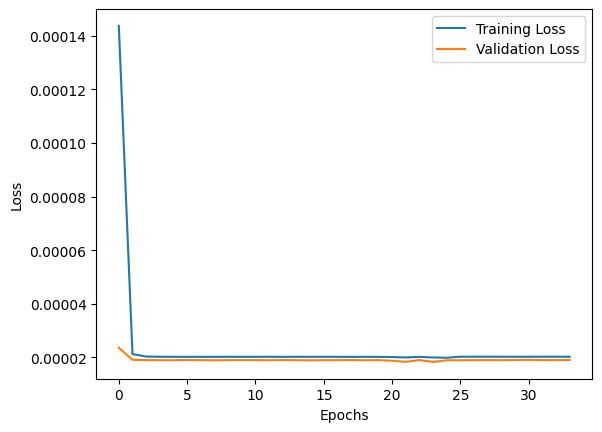

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### 2.2.1 Loss curve analysis

The loss curve plot shows both training and validation loss decrease sharply within the first few epochs, suggesting that the model is quickly learning from the data. The loss values are low so the model is performing well in terms of minimizing the loss function it was trained on. Both loss curves are closely aligned following a similar trend, indicating that the model is not overfitting.

Early stopping was employed with training stopping well before the maximum epochs with further improvement in validation loss. After the initial sharp decrease, both curves flatten out suggesting that the model has reached its capacity in learning from the data and additional training epochs are not yielding significant changes in loss.

Overall, the loss curve indicates that the model is effectively learning and generalizing to the validation data.

# **Task 3: Anomaly Detection**



From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

#### 3.1 Calculate reconstruction error

First we calculate the reconstruction error. We will use MAE here as it may be a bit easier to interpret than MSE, being on the same scale as the original data.

In [ ]:
reconstructed = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - reconstructed), axis=1)
print(reconstruction_error)


307/307 [==============================] - 1s 2ms/step
[0.00216363 0.00211082 0.00115999 ... 0.00153044 0.00059628 0.00174035]


#### 3.2 Calculate Threshold (reconstruction error)

Now we calculate the threshold value which is the cutoff above which we will consider a sample as an anomaly.

We will use a percentile cutoff technique using the provide 7% anomaly rate. More generally, setting the threshold may be based on statistical analysis of the reconstruction errors on the validation set on domain knowledge.

In [ ]:
# Assuming 'reconstruction_error' contains the mean absolute error between X_test and its reconstruction
threshold = np.percentile(reconstruction_error, 93)  # Setting threshold at the 93rd percentile (7% anomaly rate)
print(f"Threshold:", threshold)

Threshold: 0.00588339202105999


Setting this threshold (0.005864) will cause any instance from our test dataset (X_test) that has a reconstruction error larger than this value to be flagged as an anomaly.

This threshold represents the error value below which 93% of the reconstruction errors fall - so it is expected to capture the top 7% most extreme deviations in the data based on the autoencore model's reconstruction capability.

#### 3.3 Plot Threshold

Plotting the threshold on the reconstruction error histogram.

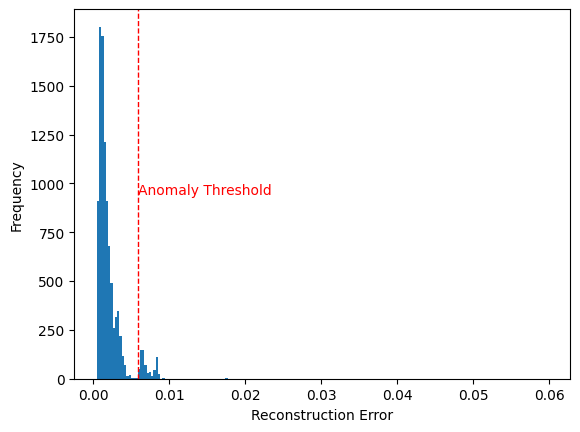

In [ ]:
plt.hist(reconstruction_error, bins=200)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

# Add a line for the anomaly threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)
plt.text(threshold, plt.ylim()[1]/2, 'Anomaly Threshold', color='red', ha='left')

plt.show()

#### 3.3 Identify Anomalies

Now we identify the predicted anomalies based on the threshold, for comparison with the true anomalies in a confusion matrix.

Confusion Matrix:
[[9093    7]
 [  39  681]]


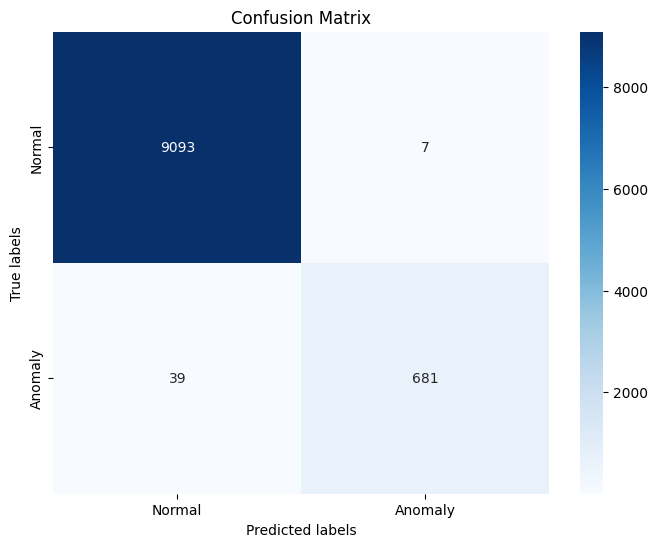

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Determining predicted anomalies based on the threshold
predicted_anomalies = reconstruction_error > threshold

# Since y_test contains the true labels, ensure it's a boolean array where '1' indicates an anomaly
true_anomalies = y_test.astype(bool)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(true_anomalies, predicted_anomalies)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

#### 3.3.1 Analyse Anomalies - Confusion Matrix

The confusion matrix shows at a glance the following results from the anomaly detection model.

* True Negatives (TN): 9093 instances correctly predicted as normal.
* False Positives (FP): 7 instances incorrectly predicted as anomalies. (these were actually normal).
* False Negatives (FN): 39 instances were incorrectly predicted as normal (these were actually anomalies).
True Positives (TP): 681 instances were correctly predicted as anomalies.

Observation based on the above;
* Based on this confusion matrix, the model has a high true negative rate, meaning it's quite effective at identifying normal instances.
* The number of false positives is low, meaning few instances of normal behavior being incorrectly flagged as anomalous, which is good.
* The true positive rate is also high, which shows that the model is capable of detecting a significant number of anomalies.
* There are more false negatives than false positives, meaning the model is more likely to miss detecting an actual anomaly than it is to incorrectly label normal behavior as anomalous. Depending on the application this could be an issue for example fraudulent credit card transactions or medical diagnosis.



Next we use the confusion matrix results to quick calculation of some key overall metrics. However, we will break down these metrics by class (normal vs. anomaly) in the classification report later.

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Specificity
specificity = tn / (tn + fp)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Youden's Index
youden_index = sensitivity + specificity - 1

print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")
print(f"Youden's Index: {youden_index}")

Specificity: 0.9992307692307693
Sensitivity: 0.9458333333333333
Youden's Index: 0.9450641025641024


* The high specificity value indicates that model has a very low false positive rate, rarely misclassifying normal instances as anomalies - important for applications where we need to avoid false alarms.
* The high sensitivity value shows that the model is also good at detecting anomalies, making it reliable for anomaly detection purposes where missing an anomaly could be critical.
* The Youden's Index being close to 1 confirms the model's effectiveness in discriminating between anomalies and normal instances. The model seems well tuned to maximize both sensitivity and specificity, so should perform well for anomaly detection tasks.



#### 3.3.2 Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generating a classification report
report = classification_report(true_anomalies, predicted_anomalies, target_names=['Normal', 'Anomaly'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9100
     Anomaly       0.99      0.95      0.97       720

    accuracy                           1.00      9820
   macro avg       0.99      0.97      0.98      9820
weighted avg       1.00      1.00      1.00      9820



Analysing the classification report;

* Precision: The precision for both the Normal and Anomaly classes is approaching 1.00, meaning that nearly all instances predicted as normal and as anomaly were correctly predicted.

* Recall: The recall for the Normal class is 1.00, indicating that the model was able to identify all normal instances. The recall for the Anomaly class is 0.95, meansing that the model successfully identified 95% of all actual anomalies. While high, it means there still 5% of anomalies not being detected.

* F1-Score: The F1-score for the Normal class is perfect at 1.00, which is expected given the perfect precision and recall. The F1-score for the Anomaly class is 0.97, which is a balance between precision and recall, and indicates a high level of model performance for detecting anomalies.

Overall, the classification report indicates that the anomaly detection model is performing very well. The precision, recall, and F1-score for both classes are high indicating a robust model. However, since the dataset is imbalanced with more Normal instances than Anomaly instances, the recall for the Anomaly class is particularly important, indicating the model ability to detect the rarer class. The fact that the recall for Anomalies is 0.95 suggests that the model is quite good at detecting anomalies but still has room for improvement to catch the remaining 5%.

The high overall accuracy is misleading because of the class imbalance, so the high F1-score for the Anomaly class is a more informative measure of performance in this context.







## 3.4 Plot latent variables

Plotting the latent variables (2d) allows us to vizualise the distribution of data in the latent space, so we can see how well the VAE is seperating normal instances from anomalies.

307/307 [==============================] - 3s 7ms/step


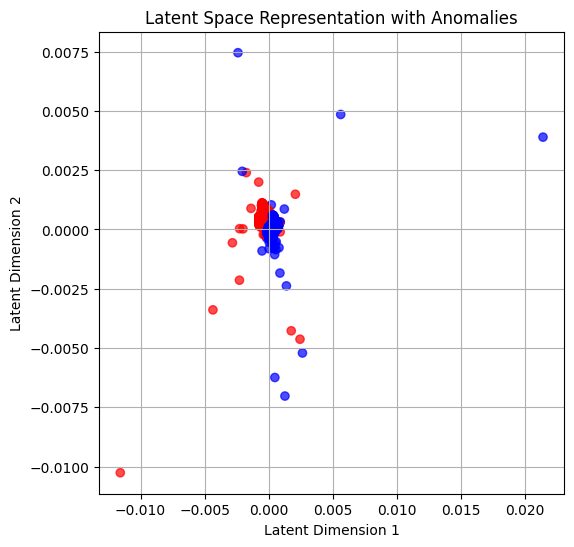

In [ ]:
# Assuming you have already trained your VAE and have `X_test` ready
z_mean, _, _ = encoder.predict(X_test)

# Now `z_mean` contains the latent representations of the test samples
# The following code will plot these latent representations

colors = ['blue' if label == 0 else 'red' for label in y_test]  # Normal data in blue, anomalies in red

plt.figure(figsize=(6, 6))
plt.scatter(z_mean[:, 0], z_mean[:, 1], alpha=0.7, c=colors)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Space Representation with Anomalies')
plt.grid(True)
plt.show()


### 3.4.1 Latent variables - Plot Analysis

The plot demonstrates that the model is _fairly_ effective at separating the instances with clustering of the normal (blue) points but perhaps a bit more scattering of the anomalies (red) indicating ability to seperate anomalies but with some apparent overlap also. So the fact the VAE appears to be encoding anomalies close to normal points in the latent space could be simply due to similarlity in features between some normal and anomalous data points or it could be that the VAE not learning a sufficiently discriminative representation. Such overlap makes it more challenging to set a clear cutoff for the anomaly detection. As such is would be worth investigating if perhaps a more sophisticated VAE architecture or additional feature engineeing - perhaps reducing the dimensions by removing some of the highly correlated features. We could also try a latent space with higher dimensions perhaps using t-SNE or PCA to help visualize these higher-dimension latent spaces.


### 4.4 Plot ROC and PR Curves

The Receiver Operating Characteristic (ROC) Curve helps summarize the skill of our model in classifiying whether data instances are anomalies (or normal). In particular, it demonstrates the trade-off between sensitivity and specificity with the AUC summarizing the overall performance of the classifier.

Precision Recall (PR) curves are often preferred in anomaly detection scenarios due to their focus on the positive class in conditions of class imbalance and where it is more important to accurately detect the rare positive cases rather than the many negative cases. The PR curve directly reflects the trade-off between the benefit of correctly identifying anomalies (recall) and the cost of tolerating false alarms (precision). In practical applications, the cost of missing an anomaly (low recall) and the cost of false alarms (low precision) are critical factors.

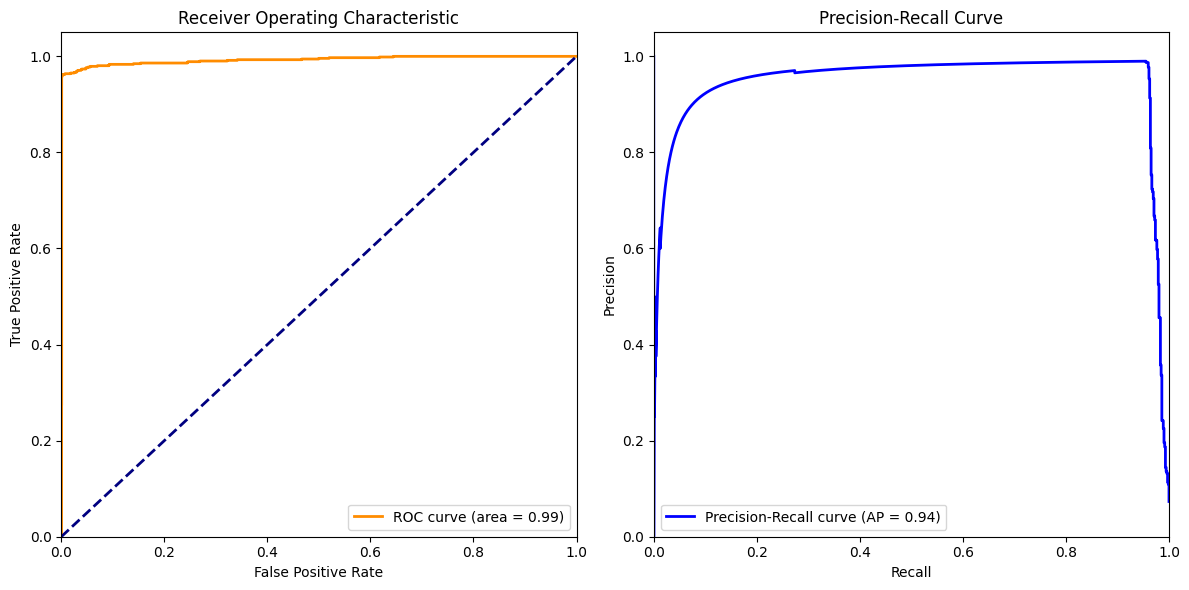

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'scores' holds the anomaly scores (e.g., reconstruction errors)
# and 'true_labels' holds the true anomaly labels for the test set.

true_labels = true_anomalies
scores = reconstruction_error

# Calculate ROC curve and AUC
fpr, tpr, roc_thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AP
precision, recall, pr_thresholds = precision_recall_curve(true_labels, scores)
ap = average_precision_score(true_labels, scores)

# Set up the plots
fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve plot
ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic')
ax_roc.legend(loc="lower right")

# Precision-Recall curve plot
ax_pr.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {ap:.2f})')
ax_pr.set_xlim([0.0, 1.0])
ax_pr.set_ylim([0.0, 1.05])
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall Curve')
ax_pr.legend(loc="lower left")

# Show the combined plot
plt.tight_layout()
plt.show()

#### 4.4.1 ROC and PR Curves - Analysis

The **Receiver Operating Characteristic (ROC)** curve indicates a very high Area Under Curve (AUC) score (0.99) suggesting that the model has excellent discrimination capabilities between the positive class (anomalies) and the negative class (normal instances). The curve hugs the top left corner, indicating both high true positive rate and low false positive rate across various thresholds characteristic of a strong classifier.

The **Precision-Recall (PR)** curve shows Average Precision (AP) score 0.94, which is quite high, indicating that the classifier performs well across different levels of thresholding. The curve starts with a high precision getting close to 1 suggesting that when the classifier declares an instance to be positive (anomaly) it is very likely correct. The curve also shows high recall for most of the threshold range, meaning the classifier is able to identify most of the actual positives correctly. There is a sharp drop in precision towards the right side, suggesting that as the classifier tries to capture all the positive instances (maximizing recall), it starts to misclassify more negative instances as positive (false positives), thus lowering precision. Overall, the AP score of 0.94 means the classifier maintains a good balance between precision and recall for most of its operational range.

### Post (complete by Sunday 04/02/24)

Once you have an implementation however rough, use the forums/topics to advertise the fact. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should refer to Task 4.

### Respond (complete by Wednesday 07/02/24)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

If you stick to the deadline then it will allow yourself and others to have enough time to implement suggestions. From the Schedule you can see that this is not a hard deadline.

The posts on the forum/topic associated with this e-tivity are graded. Below is a link to the rubrics.

https://learn.ul.ie/d2l/lp/rubrics/edit_structure.d2l?rubricId=1424&ou=17935

# **Task 4: VAE (completed by Sunday 11/02/24)**


This task is a individual task and should **not** to be uploaded to the Group Locker. No direct support should be given via the forums. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Brightpsace.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### 4.1 Create Variational Autoencoder network

Note that we will reuse the same preprocessed data from Tasks 1-3.

Here we construct a Variational Autoencoder (VAE), which differs from a standard Autoencoder (AE) in several key ways:

**Probabilistic Latent Space**: While an AE has a deterministic encoding process, a VAE has a probabilistic approach, modelling the latent space using a probability distribution (Gaussian distribution), described by means (z_mean) and variances (z_log_var).

**Reparameterization Trick**: The VAE uses a reparameterization trick for backpropagation through random sampling. This allows the model to sample from the latent distribution while still being able to compute gradients for training by sampling an epsilon from a standard normal distribution and then scaling and shifting it according to the learned parameters.

**Loss Function**: The loss function of a VAE consists the reconstruction loss (similar to AE) and the Kullback-Leibler (KL) divergence. The reconstruction loss measures how well the VAE can reconstruct the input data, while the KL divergence acts as a regularizer, enforcing the latent variables to follow the assumed distribution (e.g., standard normal distribution). This is different from an AE, which typically only minimizes the reconstruction error.

**Dense Layers Configuration**: Both the encoder and decoder parts of the VAE are built with dense layers and activation functions, similar to a standard AE. However, in the VAE, the encoder outputs parameters for the probability distribution, not just the encoded representation.

**Output of the Encoder**: The encoder model in a VAE outputs three values (z_mean, z_log_var, and z) as opposed to the single output of an encoded representation in an AE.

**Complexity and Purpose**: VAEs are generally more complex than AEs and are not just used for dimensionality reduction or reconstruction; they are also used for generative tasks, as they can generate new instances that are similar to the input data.

In summary, the key distinction lies in the VAE's ability to deal with probabilistic encodings and its use of the reparameterization trick, enabling it to be part of the generative models family.







In [ ]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
import tensorflow as tf

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def build_vae(input_dim, latent_dim=2):
    # Encoder
    input_layer = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(input_layer)
    x = Dense(32, activation='relu')(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)

    # Use reparameterization trick to ensure correct gradient
    z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Decoder
    decoder_input = Input(shape=(latent_dim,))
    x = Dense(32, activation='relu')(decoder_input)
    x = Dense(64, activation='relu')(x)
    output_layer = Dense(input_dim, activation='sigmoid')(x)

    # Instantiate encoder, decoder, and VAE models
    encoder = Model(input_layer, [z_mean, z_log_var, z], name='encoder')
    decoder = Model(decoder_input, output_layer, name='decoder')
    output_layer = decoder(encoder(input_layer)[2])

    vae = Model(input_layer, output_layer, name='vae')

    # VAE loss = mse_loss or xent_loss + kl_loss
    reconstruction_loss = binary_crossentropy(input_layer, output_layer) * input_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    vae_loss = K.mean(reconstruction_loss + kl_loss)
    vae.add_loss(vae_loss)
    vae.compile(optimizer='adam')

    return encoder, decoder, vae

input_dim = X_train.shape[1]
encoder, decoder, vae = build_vae(input_dim)

#### 4.1 Train the autoencoder network

Next we will train the autoencoder network in TensorFlow with the addition of an early stopping mechanism to prevent overfitting.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Assuming X_train and X_test are already defined and preprocessed
input_dim = X_train.shape[1]
latent_dim = 2  # Or another dimensionality of the latent space you wish to use
encoder, decoder, vae = build_vae(input_dim, latent_dim)

# No need to specify a loss function here as it's already included in the model
vae.compile(optimizer=Adam(learning_rate=0.001))

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Train the VAE with the early stopping callback
history = vae.fit(
    X_train, X_train,
    epochs=1000,  # The maximum number of epochs to run
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping]  # List of callbacks to apply during training
)


Epoch 1/1000
154/154 [==============================] - 3s 6ms/step - loss: 6.2048 - val_loss: 6.2006
Epoch 2/1000
154/154 [==============================] - 1s 5ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 3/1000
154/154 [==============================] - 1s 5ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 4/1000
154/154 [==============================] - 1s 5ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 5/1000
154/154 [==============================] - 1s 4ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 6/1000
154/154 [==============================] - 1s 7ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 7/1000
154/154 [==============================] - 1s 7ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 8/1000
154/154 [==============================] - 1s 7ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 9/1000
154/154 [==============================] - 1s 5ms/step - loss: 6.2005 - val_loss: 6.2005
Epoch 10/1000
154/154 [==============================] - 1s 4ms/step - loss: 6.200

#### 4.2 Plot the loss curve

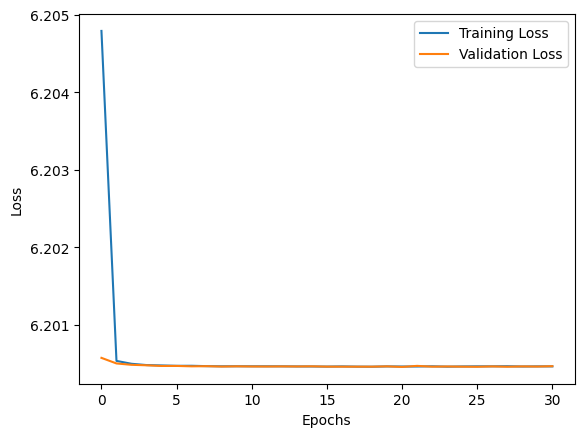

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### 4.2.1 Loss curve analysis

The model demonstrates rapid learning with a sharp initial decline in both training and validation loss, and the low loss values indicate effective performance. The parallel trend of the loss curves points to good generalization without overfitting, as confirmed by early stopping which halts training when validation loss ceases to improve. Ultimately, the loss curves suggest the model has learned well from the data and additional training is unlikely to yield substantial gains.

## 4.3 Anomaly Detection

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

#### 4.3.1 Calculate reconstruction error

In [ ]:
import numpy as np

# Use the VAE model to reconstruct the X_test data
reconstructed = vae.predict(X_test)

# Calculate the mean absolute error between the original and reconstructed data
reconstruction_error = np.mean(np.abs(X_test - reconstructed), axis=1)

print(reconstruction_error)


307/307 [==============================] - 1s 2ms/step
[0.00215074 0.00217697 0.00112556 ... 0.00138497 0.00081316 0.00198599]



#### 4.3.2 Calculate Threshold (reconstruction error)

In [ ]:
# Assuming 'reconstruction_error' contains the mean absolute error between X_test and its reconstruction
threshold = np.percentile(reconstruction_error, 93)  # Setting threshold at the 93rd percentile (7% anomaly rate)
print(f"Threshold:", threshold)

Threshold: 0.0057659960025921485


#### 4.3.3 Plot Threshold

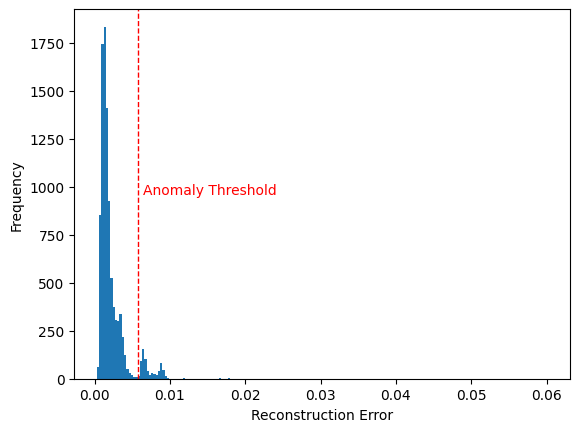

In [ ]:
import matplotlib.pyplot as plt

plt.hist(reconstruction_error, bins=200)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

# Add a line for the anomaly threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=1)

# Adjust text position dynamically based on the threshold and plot's current limits
text_position = plt.ylim()[1] / 2
plt.text(threshold + (plt.xlim()[1] - plt.xlim()[0]) * 0.01, # Slightly right of the threshold
         text_position, 'Anomaly Threshold', color='red', ha='left')

plt.show()


#### 4.3.4 Identify Anomalies

Now we identify the predicted anomalies based on the threshold, for comparison with the true anomalies in a confusion matrix.

Confusion Matrix:
[[9093    7]
 [  39  681]]


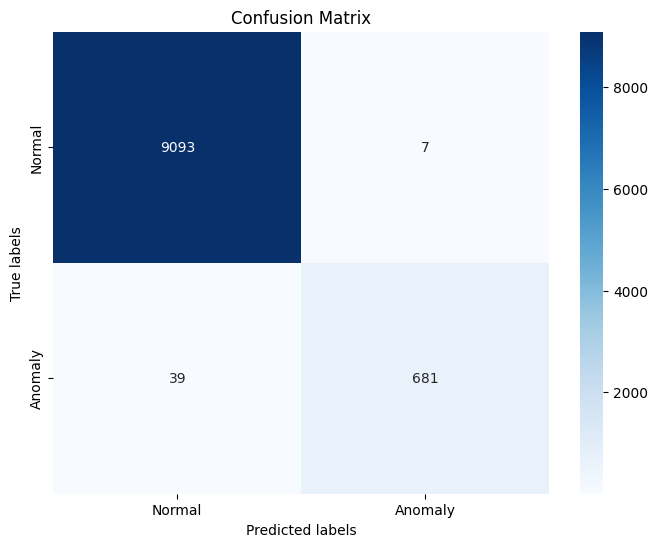

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and reconstruction_error are defined and threshold is calculated

# Determining predicted anomalies based on the threshold
predicted_anomalies = reconstruction_error > threshold

# Since y_test contains the true labels, ensure it's a boolean array where '1' indicates an anomaly
true_anomalies = y_test.astype(bool)

# Calculating the confusion matrix
conf_matrix = confusion_matrix(true_anomalies, predicted_anomalies)
print("Confusion Matrix:")
print(conf_matrix)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


#### 4.3.5 Analyse Anomalies - Confusion Matrix

Observation based on the above;
* The model has a high true negative rate, meaning it's quite effective at identifying normal instances.
* The number of false positives is low, meaning few instances of normal behavior being incorrectly flagged as anomalous, which is good.
* The true positive rate is also high, which shows that the model is capable of detecting a significant number of anomalies.
* There are more false negatives than false positives, meaning the model is more likely to miss detecting an actual anomaly than it is to incorrectly label normal behavior as anomalous.

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Generating a classification report
report = classification_report(true_anomalies, predicted_anomalies, target_names=['Normal', 'Anomaly'])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      9100
     Anomaly       0.99      0.95      0.97       720

    accuracy                           1.00      9820
   macro avg       0.99      0.97      0.98      9820
weighted avg       1.00      1.00      1.00      9820



- Precision for both classes is nearly perfect, suggesting that the model's predictions are highly reliable.
- Recall is perfect for Normal instances and very high for Anomalies at 0.95, although some anomalies are missed.
- F1-scores are excellent, indicating a strong balance between precision and recall, especially for anomaly detection.
- The model demonstrates robust performance in identifying both normal and anomalous instances, with a slight margin for improvement in anomaly detection.
- The overall high metrics could be somewhat deceptive due to class imbalance; thus, the high F1-score for Anomalies is a crucial indicator of the model's true performance.

### 4.5 Plot ROC and PR Curves

The ROC Curve illustrates our model's effectiveness in distinguishing anomalies from normal instances, with the AUC value quantifying overall performance, while the PR Curve is more indicative of anomaly detection success in imbalanced datasets, highlighting the crucial balance between detecting true anomalies and minimizing false positives. Both curves provide insights into different aspects of model performance, with the PR Curve offering a more nuanced view in scenarios where the positive class is of greater interest.

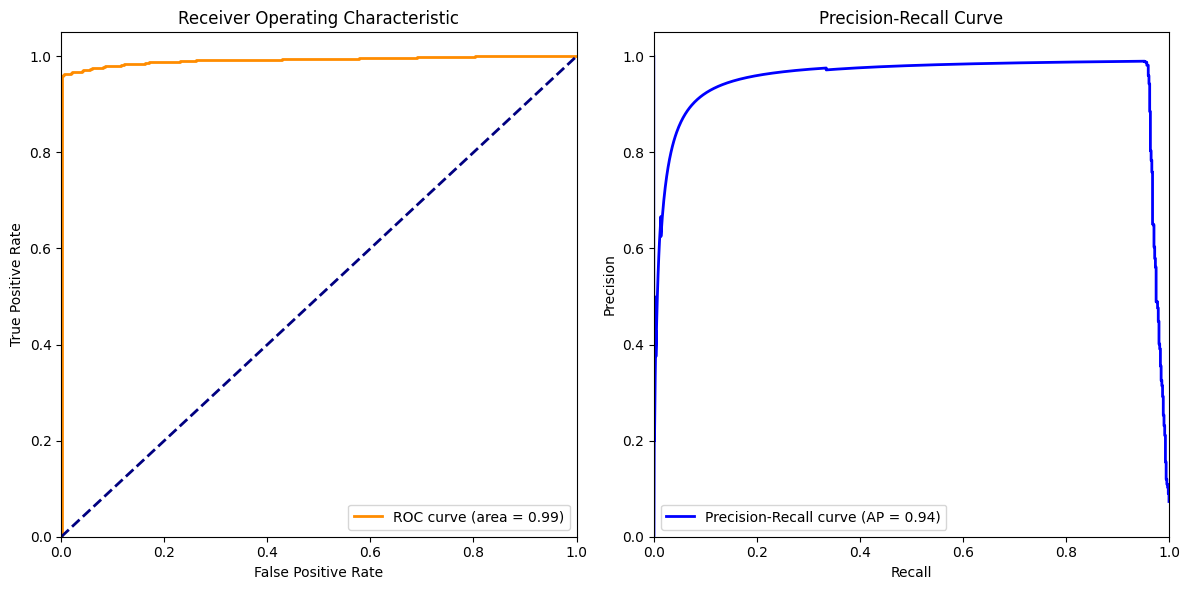

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'scores' holds the anomaly scores (e.g., reconstruction errors)
# and 'true_labels' holds the true anomaly labels for the test set.

# Calculate ROC curve and AUC
fpr, tpr, roc_thresholds = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)

# Calculate precision-recall curve and AP
precision, recall, pr_thresholds = precision_recall_curve(true_labels, scores)
ap = average_precision_score(true_labels, scores)

# Set up the plots
fig, (ax_roc, ax_pr) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve plot
ax_roc.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
ax_roc.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax_roc.set_xlim([0.0, 1.0])
ax_roc.set_ylim([0.0, 1.05])
ax_roc.set_xlabel('False Positive Rate')
ax_roc.set_ylabel('True Positive Rate')
ax_roc.set_title('Receiver Operating Characteristic')
ax_roc.legend(loc="lower right")

# Precision-Recall curve plot
ax_pr.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {ap:.2f})')
ax_pr.set_xlim([0.0, 1.0])
ax_pr.set_ylim([0.0, 1.05])
ax_pr.set_xlabel('Recall')
ax_pr.set_ylabel('Precision')
ax_pr.set_title('Precision-Recall Curve')
ax_pr.legend(loc="lower left")

# Show the combined plot
plt.tight_layout()
plt.show()


The **ROC curve** showcases the model's superior ability to distinguish between anomalies and normal instances with an AUC of 0.99, reflecting high true positive rates and low false positive rates, indicative of its robust classification strength. Meanwhile, the **Precision-Recall (PR) curve** reveals an Average Precision score of 0.94, demonstrating the model's effectiveness at a wide range of thresholds, with a noteworthy balance between precision—almost perfect at the start—and recall, despite a precision decline at higher recall levels, underscoring the model's proficient anomaly detection amidst class imbalance.

### Final Submission (complete by Sunday 11/02/24)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


In [ ]:
## Add additional code cells to implememt the tasks stated above

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.